In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore")

In [2]:
def asy_form(s, b):
#     print((2*((s+b)*np.log(1+s/b)-s))**0.5)
    return (2*((s+b)*np.log(1+s/b)-s))**0.5

def rss(a, b):
    return (a**2 + b**2)**0.5

In [29]:
# old numbers (using 1-P_B cut, then 2D grid cuts)
# Maj region
M_M = 25
D_M = 0
B_M = 1.8


# Dir region
M_D = 25
D_D = 50
B_D = 324


V2_lim = 1

In [18]:
# new numbers (using 1-P_B cut, then 1 perpendiculr P1-P2 cut)
# Maj region
M_M = 128 / 2e-5
D_M = 0.29 / 2e-5 
B_M = 28


# Dir region
M_D = 126 / 2e-5
D_D = 239 / 2e-5 
B_D = 852

V2_lim = 5e-6

In [19]:
# testing totalling sym. case

# # Maj region
# M_M = 128 / 2e-5
# D_M = 0.29 / 2e-5 
# B_M = 28


# # Dir region
# M_D = 0.29 / 2e-5
# D_D = 128 / 2e-5 
# B_D = 28

# V2_lim = 5e-6

In [20]:
def get_N_M(V2_M, V2_D):
    return (M_M * V2_M) + (D_M * V2_D) + B_M
def get_N_D(V2_M, V2_D):
    return (M_D * V2_M) + (D_D * V2_D) + B_D

In [21]:
def cal_sig(V2_M, V2_D, r):
    Z_M = asy_form(get_N_M(V2_M, V2_D) - get_N_M(V2_lim*r, V2_lim*(1-r)), get_N_M(V2_lim*r, V2_lim*(1-r)))
    Z_D = asy_form(get_N_D(V2_M, V2_D) - get_N_D(V2_lim*r, V2_lim*(1-r)), get_N_D(V2_lim*r, V2_lim*(1-r)))
    return rss(Z_M, Z_D)

In [30]:
N_sigma = 1

y_max = -99999
x_max = -99999

data_dt = {}

for r in np.arange(0, 1+0.000001, 0.2):
    print(r)

    df = pd.DataFrame(columns=['M', 'D', 'Z', 'slope'])

    m_lt = []
    d_lt = []
    z_lt = []
    for V2_M in np.linspace(V2_lim * -0.05, V2_lim*2.5, 500):
        for V2_D in np.linspace(V2_lim * -0.05, V2_lim*2.5, 500):
            Z = cal_sig(V2_M, V2_D, r)
            m_lt.append(V2_M)
            d_lt.append(V2_D)
            z_lt.append(Z)

    df['M'] = m_lt
    df['D'] = d_lt
    df['Z'] = z_lt

    df['sol'] = abs(df.Z - N_sigma)
    df_plot = df[df.sol < 0.01]
    df_plot['slope'] = (df_plot['D'] - V2_lim * (1-r)) / (df_plot['M'] - V2_lim * r)
    df_plot = df_plot.sort_values('slope')
    df_plot1 = df_plot[df_plot.M > V2_lim*r]
    df_plot2 = df_plot[df_plot.M <= V2_lim*r]
    df_plot = pd.concat([df_plot1, df_plot2, df_plot1.iloc[:1]])
    
    if y_max < df_plot.D.max():
        y_max = df_plot.D.max()
    if x_max < df_plot.M.max():
        x_max = df_plot.M.max()
        
    data_dt[r] = df_plot
    

0.0
0.2
0.4
0.6000000000000001
0.8
1.0


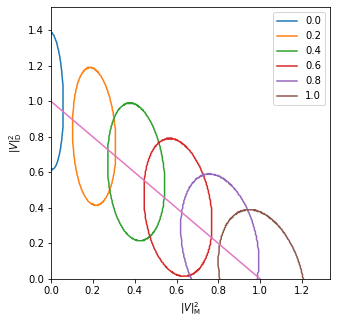

In [31]:
plt.figure(figsize=(5,5))

for r, df_plot in data_dt.items():
    plt.plot(df_plot.M, df_plot.D, label=round(r,1))
        
    
plt.plot([0, V2_lim], [V2_lim, 0])

plt.margins(x=0, y=0)
plt.xlim(0, x_max*1.1)
plt.ylim(0, y_max*1.1)
plt.xlabel(r'$|V|^2_{\rm M}$')
plt.ylabel(r'$|V|^2_{\rm D}$')
plt.legend()

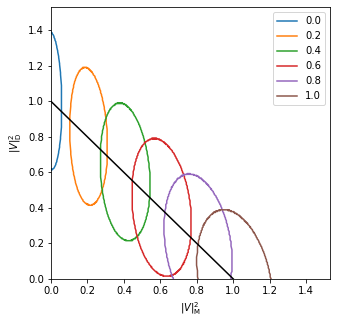

In [32]:
plt.figure(figsize=(5,5))

for r, df_plot in data_dt.items():
    plt.plot(df_plot.M, df_plot.D, label=round(r,1))
        
    
plt.plot([0, V2_lim], [V2_lim, 0], c='black')

plt.margins(x=0, y=0)
plt.xlim(0, max([x_max, y_max])*1.1)
plt.ylim(0, max([x_max, y_max])*1.1)
plt.xlabel(r'$|V|^2_{\rm M}$')
plt.ylabel(r'$|V|^2_{\rm D}$')
plt.legend()